<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar el archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_extended.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(ruta_archivo)

In [2]:
# Paso 2: Análisis Exploratorio
# Puedes imprimir información básica sobre el conjunto de datos
print("Información del conjunto de datos:")
print(data.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None

Estadísticas descriptivas:
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g  \
count     3430.000000    3430.000000        3430.000000   3430.0

In [3]:
data = data.dropna()

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None


In [5]:
# Visualizar las primeras filas del conjunto de datos
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [8]:
# Obtiene los valores únicos de la columna "Columna"
valores_unicos = data["life_stage"].unique()

# Imprime los valores únicos
print(valores_unicos)

['adult' 'juvenile' 'chick']


In [6]:
data['sex'] = data['sex'].replace({"female": 0, "male": 1})
data['sex'] = data['sex'].astype(int)

data['life_stage'] = data['life_stage'].replace({"adult": 0, "juvenile": 1, "chick": 2})
data['life_stage'] = data['life_stage'].astype(int)


C:\Users\migue\AppData\Local\Temp\ipykernel_30048\367028583.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({"female": 0, "male": 1})
C:\Users\migue\AppData\Local\Temp\ipykernel_30048\367028583.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['life_stage'] = data['life_stage'].replace({"adult": 0, "juvenile": 1, "chick": 2})


In [12]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "life_stage", "sex"]]
y = data['species']

In [8]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     3430 non-null   float64
 1   bill_depth_mm      3430 non-null   float64
 2   flipper_length_mm  3430 non-null   float64
 3   body_mass_g        3430 non-null   float64
 4   life_stage         3430 non-null   int32  
 5   sex                3430 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 134.1 KB
None


In [14]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.66


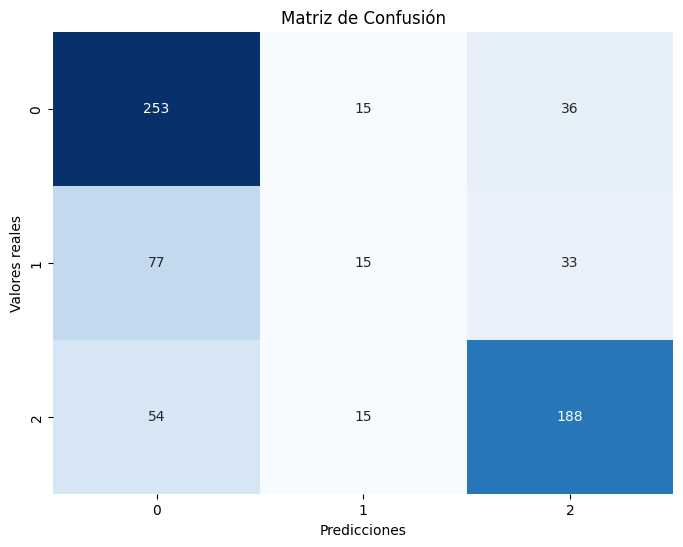


Informe de Clasificación:
              precision    recall  f1-score   support

      Adelie       0.66      0.83      0.74       304
   Chinstrap       0.33      0.12      0.18       125
      Gentoo       0.73      0.73      0.73       257

    accuracy                           0.66       686
   macro avg       0.57      0.56      0.55       686
weighted avg       0.63      0.66      0.63       686



In [15]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [18]:
# Paso 6: Guardar el modelo entrenado
import pickle

with open('modelo_especie.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)
    
# Paso 7: Cargar el modelo entrenado
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)
    

Ejercicio de Pipeline

In [9]:
#Pipeline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# scoring data
from sklearn.metrics import accuracy_score

Usando el siguiente pipeline se obtiene una precisión del modelo similar al que arroja el análisis completo hecho anteriormente:

In [15]:
#The data spliting is executed here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# Data gets scaled >> Classification of decission tree
pipe = Pipeline([('std', StandardScaler()), ('decision_tree', RandomForestClassifier(random_state=42))], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)


print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.7s
0.6518950437317784


Este pipeline solo se usó para probar otras transformaciones. Su resultado de precisión del modelo es inferior al anterior pipeline

In [17]:
pipe = Pipeline([('pca', PCA(n_components = 2)), ('decision_tree', RandomForestClassifier(random_state=42))], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.2s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.7s
0.45714285714285713
